In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from utils import figure_8
from utils import net

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


##### In this notebook, we will train our NN one dataset with a fixed mean and variance. After that, we test our model with other datasets with different variances. The aim of this experiment is to study the error on different datasets.

In [37]:
def test_performance_ADAM_ASAM_SAM(number_points, var, epochs):
    """
    number_points : numbers_point_per_datasets
    var : variance of one dataset
    epochs : number of training epochs
    """
    number_points = 2000
    var = 15
    variances = np.arange(5,40,0.5) #List of variances
    errors_ADAM = [] #List to store errors during testing
    errors_ASAM = [] #List to store errors during testing
    errors_SAM = []  #List to store errors during testing

    #creation of the dataset
    train_dataset = figure_8(number_points, var)

    #plot
    fig, ax = plt.subplots()
    train_dataset.plot(ax)

    #creation of test datasets
    test_datasets = []
    for var in variances :
        test_datasets.append(figure_8(number_points, var))

    #creation of the nets
    net_ADAM = net()
    net_ASAM = net()
    net_SAM = net()

    #training
    print("training ADAM...")
    net_ADAM.train(train_dataset.get_dataset(), epochs)
    print("training ASAM...")
    net_ASAM.train(train_dataset.get_dataset(), epochs)
    print("training SAM...")
    net_SAM.train(train_dataset.get_dataset(), epochs)

    #testing
    for test_dataset in test_datasets:
        errors_ADAM.append(net_ADAM.test(test_dataset.get_dataset()))
        errors_ASAM.append(net_ASAM.test(test_dataset.get_dataset()))
        errors_SAM.append(net_SAM.test(test_dataset.get_dataset()))

    #ploting
    fig = plt.figure(figsize=(10,5))
    plt.plot(variances, errors_ADAM, label='ADAM')
    plt.plot(variances, errors_ASAM, label='ASAM')
    plt.plot(variances, errors_SAM, label='SAM')
    plt.xlabel('Variances')
    plt.ylabel('Error')
    plt.legend()

    plt.show()
    

training ADAM...
training ASAM...
training SAM...


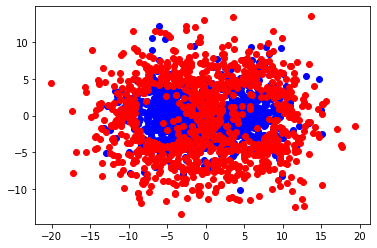

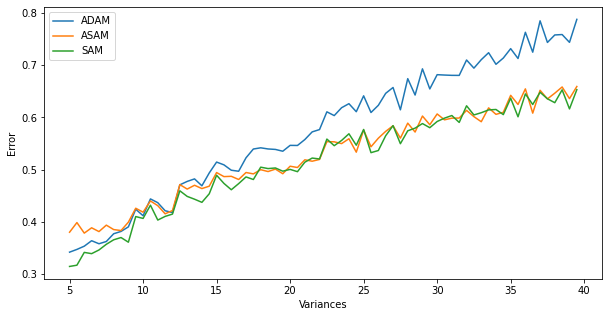

In [38]:
test_performance_ADAM_ASAM_SAM(500, 35, 500)